## Projeto 4

### 1 - Considere os dados abaixo:

### Usando o método means, determine o número ideal de sementes (Elbow Method) para noise=0.1, 0.2 e 0.5.

#### noise=0.1

In [1]:
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np 
import matplotlib.pyplot as plt
# generate 2d classification dataset
n_samples = 200
X, y = skdata.make_moons(n_samples=n_samples, noise=0.1)

d = np.column_stack((X,np.transpose(y)))
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.average(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))

#### noise = 0.2

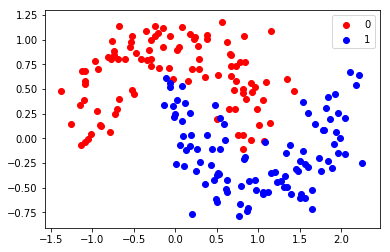

In [3]:
# generate 2d classification dataset
n_samples = 200
X, y = skdata.make_moons(n_samples=n_samples, noise=0.2)

d = np.column_stack((X,np.transpose(y)))
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

In [4]:
# k means determine k
distortions2 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions2.append(np.average(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))

#### noise = 0.5

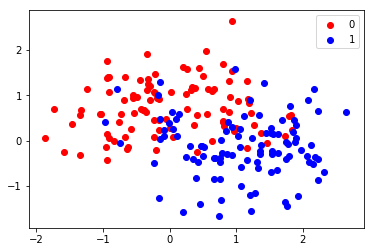

In [5]:
# generate 2d classification dataset
n_samples = 200
X, y = skdata.make_moons(n_samples=n_samples, noise=0.5)

d = np.column_stack((X,np.transpose(y)))
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

In [6]:
# k means determine k
distortions3 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions3.append(np.average(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))

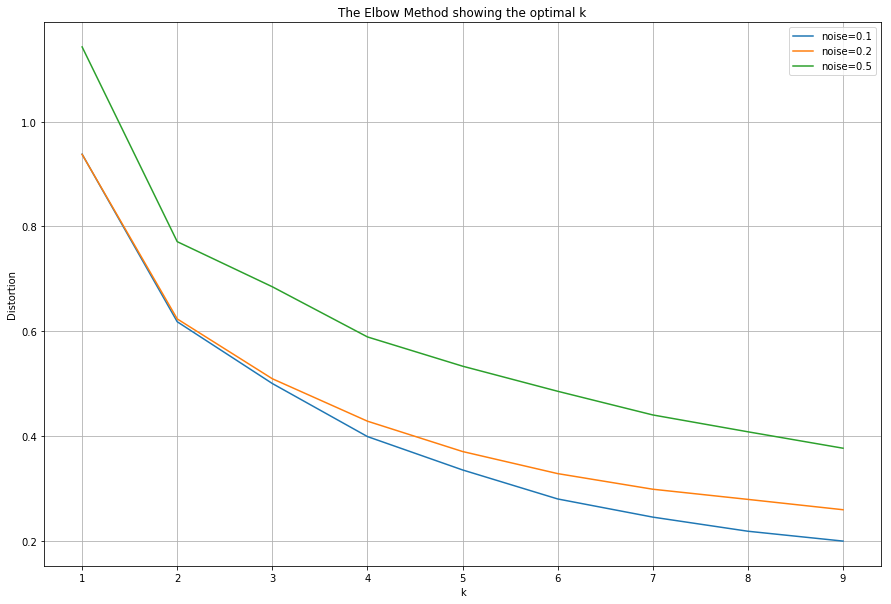

In [7]:
# Plot the elbow
plt.figure(figsize=(15,10))
plt.plot(K, distortions, label='noise=0.1')
plt.plot(K, distortions2, label='noise=0.2') 
plt.plot(K, distortions3, label='noise=0.5')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.grid(True)
plt.title('The Elbow Method showing the optimal k')
plt.show()

###  2 - Construa um gráfico da medida silhouette_score em função do nível de ruído noise. Considere os métodos k-means e spectral clustering.

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering

noise = []
silhouette_kmeans = []
silhouette_spectral = []
n_samples = 200
for i in np.arange(0, 1, 0.1):
    noise.append(i)
    X, y = skdata.make_moons(n_samples=n_samples, noise=i)

    d = np.column_stack((X,np.transpose(y)))
    data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
    features_names = ['X1', 'X2']
    class_labels = np.unique(y)
    
    #KMeans
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)

    labels = kmeans.labels_
    silhouette_kmeans.append(silhouette_score(X, labels, metric='euclidean'))
    
    #Spectral Clustering
    spc = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(X)
    y_spc = spc.fit_predict(X)
    labels2 = spc.labels_
    silhouette_spectral.append(silhouette_score(X, labels2, metric='euclidean'))


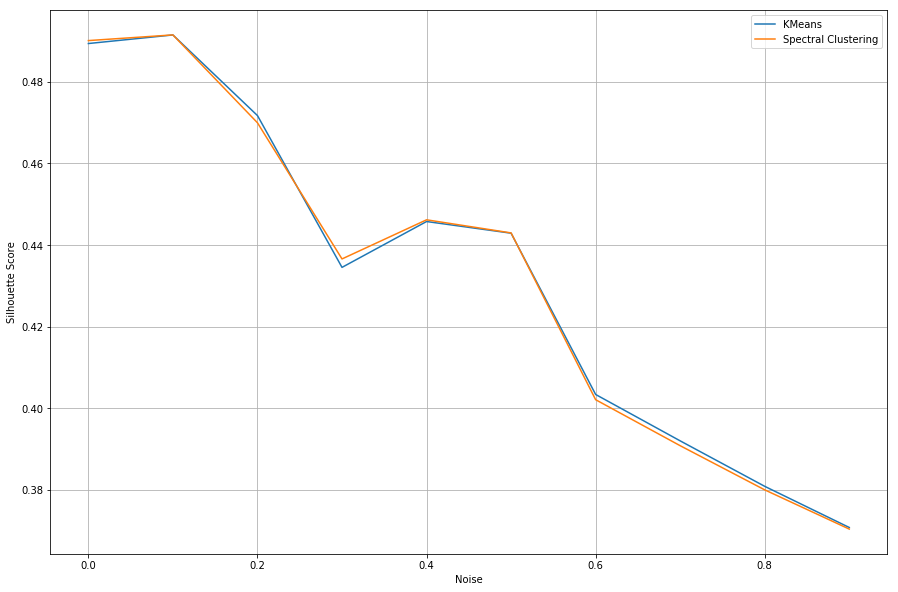

In [9]:
plt.figure(figsize=(15,10))
plt.xlabel("Noise")
plt.ylabel("Silhouette Score")
plt.plot(noise, silhouette_kmeans, label='KMeans')
plt.plot(noise, silhouette_spectral, label='Spectral Clustering')
plt.legend(loc='best')
plt.grid(True)
plt.show(True)


### 3 - Para o método DBSCAN, varie os valores eps e min_samples para obter o máximo da medida silhouette_score. Grafique os resultados para os melhores valores encontrados.

### 4 - Considere os dados da Iris. Construa os dendrogramas usando Agglomerative Hierarchical Clustering com os métodos average linkage, Ward e Complete Linkage. Encontre o melhor valor de k e mostre os dados projetados usando PCA e os clusters obtidos.

In [22]:
import random
random.seed(1)
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#CSV file
features = pd.read_csv("data/iris.csv", header=(0))
print(features.shape)
features.head(10)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [23]:
features = features.dropna()
print(features.shape)

(150, 5)


In [24]:
features.duplicated()
features = features.drop_duplicates()
print(features.shape)

(147, 5)


In [25]:
features = features.replace('?', np.nan)
features = features.dropna()
print(features.shape)

(147, 5)


In [26]:
classes = pd.unique(features[features.columns[-1]]) #name of the classes
classes = np.array(classes, dtype=str) #convert on array
print("Classes únicas no conjunto de dados:", classes)
list_labels = list(features.columns)
print("\nNomes dos atributos e classe:",list_labels)

Classes únicas no conjunto de dados: ['setosa' 'versicolor' 'virginica']

Nomes dos atributos e classe: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [27]:
#Variável Y => classes de base para a classificação
Y = np.array(features[list_labels[-1]], dtype=str)

#Removendo os labels do features
features = features.drop(list_labels[-1], axis = 1)
#Variável X => convertendo o features para numpy array
X = np.array(features)

features.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [28]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

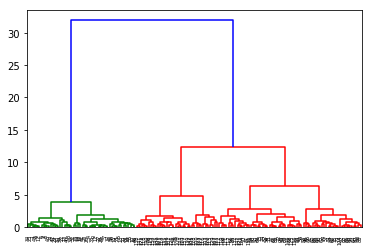

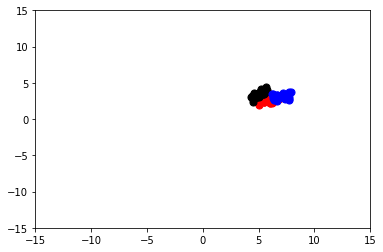

In [30]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show(True)
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=50, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=50, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=50, c='blue')
plt.scatter(X[y_hc ==3,0], X[y_hc == 3,1], s=50, c='cyan')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show(True)

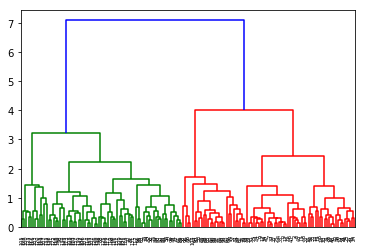

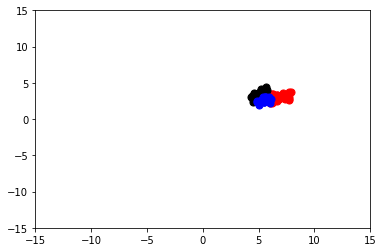

In [32]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.show(True)
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
# save clusters for chart
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=50, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=50, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=50, c='blue')
plt.scatter(X[y_hc ==3,0], X[y_hc == 3,1], s=50, c='cyan')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show(True)

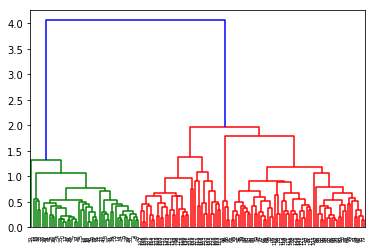

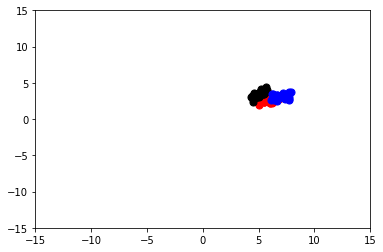

In [33]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))
plt.show(True)
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=50, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=50, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=50, c='blue')
plt.scatter(X[y_hc ==3,0], X[y_hc == 3,1], s=50, c='cyan')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show(True)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

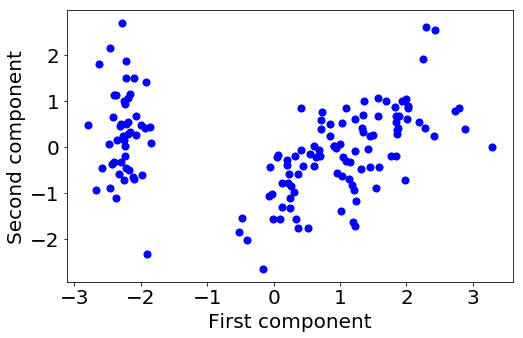

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(pca_result[:,0], pca_result[:,1], s=50, color = 'blue')
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

### 5- Compare os métodos de clustering para os dados da iris usando a medida normalize mutual information (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html).